### A box counting algorithm

My interpretation of the box counting algorithm

In [61]:
# Import stuff
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from code.plot_utils import plot_pretty
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [62]:
def box_counts(x,y, n_bins, hist_range):
    """
    Returts....
    """
    Hist, xedg, yedg = np.histogram2d(x,y, bins=n_bins, range=hist_range, density=False)
    counts = np.sum(Hist>0)
    print(np.shape(Hist))
    return counts


In [63]:
def frac_dimension(X, threshold):
    """
    Code that calculates the fractal dimensions
    """
    
    ## Convert X to a binary array
    #X = (X > threshold)
    
    M_dim = max(X.shape)
    
    p = np.ceil((np.log(M_dim)/np.log(2.0)))
    
    int_p = int(p)
    print(int_p)
    
    rows = len(X[:,0])
    cols = len(X[0,:])
    
    len_X = int(2.0**int_p)
    
   
    #Define new matrix, which is padded with zeros in the other dimension
    X_padded = np.ones([len_X,len_X])
    
    for i in range(rows):
        for j in range(cols):
            X_padded[i,j] = X[i,j]
    
    
    x_s = []
    y_s = []
    for i in range(len_X):
        for j in range(len_X):
            if (X_padded[i,j]<0.9):
                x_s.append(i)
                y_s.append(j)
                
    x_arr = np.asarray(x_s)
    y_arr = np.asarray(y_s)
    
    pl.plot(y_arr, x_arr, '.', ms=0.01)
    pl.show()
    
    # Now an array of exponents, from p to 1
    exponents = np.arange(int_p, -1, -1)   # Note: here I can possibly change the minimum box size, instead of zero
    
    sizes = 2.0**exponents # box sizes
    n_bins = sizes[::-1]
    
    hist_ranges = [[0,len_X], [0, len_X]]
    
    counts = np.zeros(len(n_bins))
    
    for i in range(len(n_bins)):
        num_bin = int(n_bins[i])
        print(exponents[i])
        
        counts[i] = box_counts(x_arr,y_arr, num_bin, hist_ranges)
    
    
    return counts, sizes
    
    
    
    
   

In [64]:
import pylab as pl
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray
I = rgb2gray(pl.imread("SF_streets.png"))


12


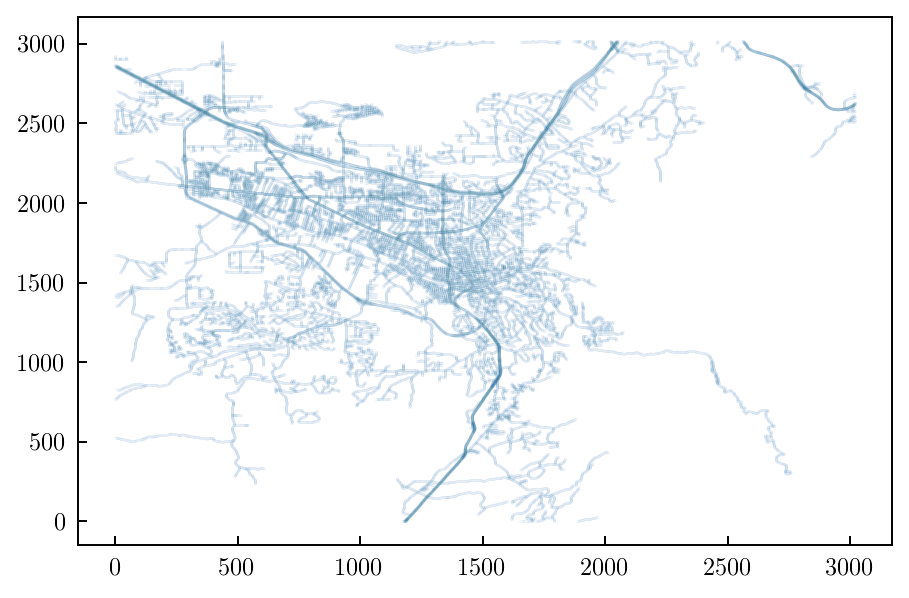

12
(1, 1)
11
(2, 2)
10
(4, 4)
9
(8, 8)
8
(16, 16)
7
(32, 32)
6
(64, 64)
5
(128, 128)
4
(256, 256)
3
(512, 512)
2
(1024, 1024)
1
(2048, 2048)
0
(4096, 4096)


In [65]:
count, siz = frac_dimension(I, 0.0)

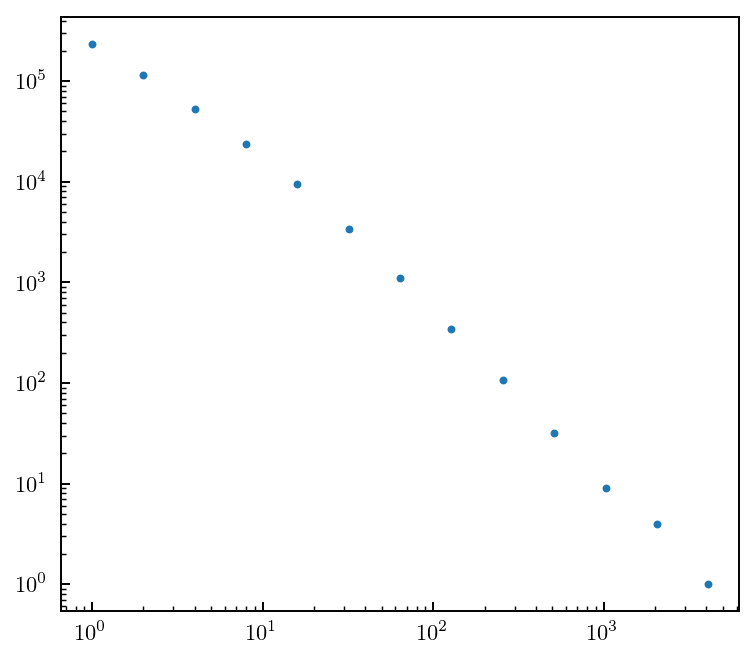

In [66]:
plot_pretty()
fig = plt.figure(figsize = (5.0,4.5))

#plt.scatter(np.log10(siz), np.log10(count), s=10.0)
plt.scatter(siz, count, s= 5.0)
plt.xscale('log');plt.yscale('log')

plt.show()

In [67]:
coeffs= np.polyfit(np.log10(siz), np.log10(count), 1)

print(-coeffs[0])

1.5167164874210919
